In [222]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [223]:
#Downloading dataset from web
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 72629  100 72629    0     0  38515      0  0:00:01  0:00:01 --:--:-- 38776


In [224]:
data = pd.read_csv('FuelConsumptionCo2.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,"SUV,SMALL",3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,"SUV,SMALL",3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [225]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [226]:
#Specifing which data is going to be used in analysis 
cdata = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

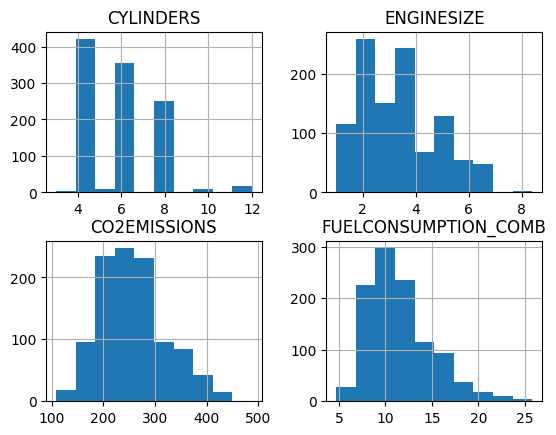

In [227]:
viz = cdata[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

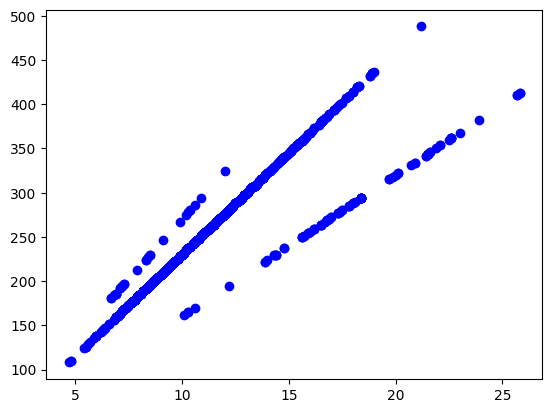

In [228]:
plt.scatter(cdata.FUELCONSUMPTION_COMB, cdata.CO2EMISSIONS, color='blue')
plt.show()

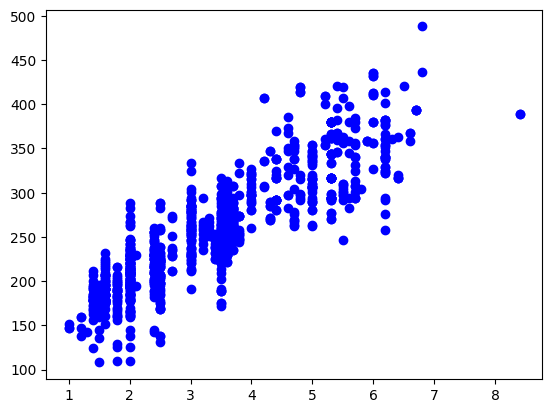

In [229]:
plt.scatter(cdata.ENGINESIZE, cdata.CO2EMISSIONS, color='blue')
plt.show()

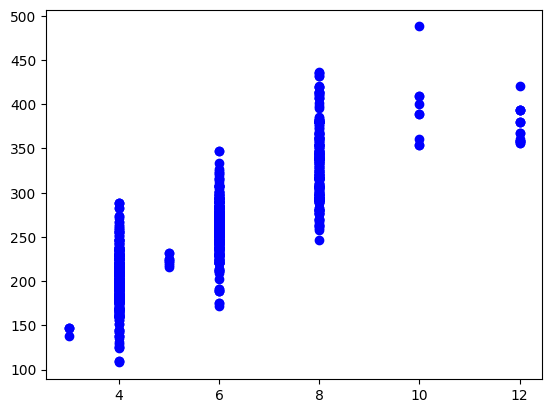

In [230]:
plt.scatter(cdata.CYLINDERS, cdata.CO2EMISSIONS, color='blue')
plt.show()

Simple Linear Regression (SLR),which is using only two variables. X which is independent variable and Y dependent variable. The key point is that dependent values should be continious. SLR is used when one independet variable(x) is used to estiamte dependent variable (y). In this dataset, the dependent varibale is the "Co2Emissions" column. 

In [231]:
#This code is separating dataset into two parts (training and test). 80% of dataset will be in training phase and 20% in the test phase.
#The cdata is the data that is going to be separted. The (len(cdata))<0.8 is indicating the size of the train and test sample. "~" sign 
#is choosing the rest of the data set so values will not be mixed.
mask = np.random.rand(len(data))<0.8
train = cdata[mask]
test = cdata[~mask]

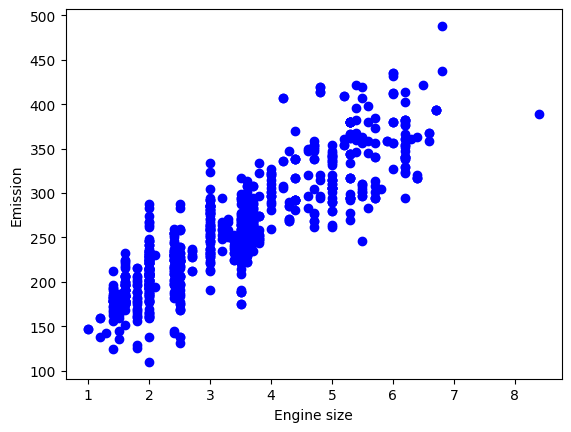

In [232]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [233]:
#Importing the linear_model to from sklearn, which contains various linear models.
from sklearn import linear_model

#Linear regression model object is instantiated using the LinearRegression() class from scikit-learn. 
#This object (regr) will be used to fit the model to the data.
regr = linear_model.LinearRegression()

#This code preapres data by extracting columns to perfome the analysis and converts them to the NumPy arrays.
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#The fit() method is called on the linear regression model object (regr) with the training data (train_x and train_y) as arguments. 
#This fits the linear regression model to the training data, estimating the coefficients.
regr.fit(train_x, train_y)

#The coefficients and intercept (regr.coef_), (regr.intercepts_)  the coefficient(s) determine the slope(s) of the linear relationship between the independent variable(s) and the dependent variable.
#While the intercept represents the baseline value of the dependent variable when all independent variables are zero.
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_) 

Coefficients:  [[39.5995414]]
Intercept:  [124.38792549]


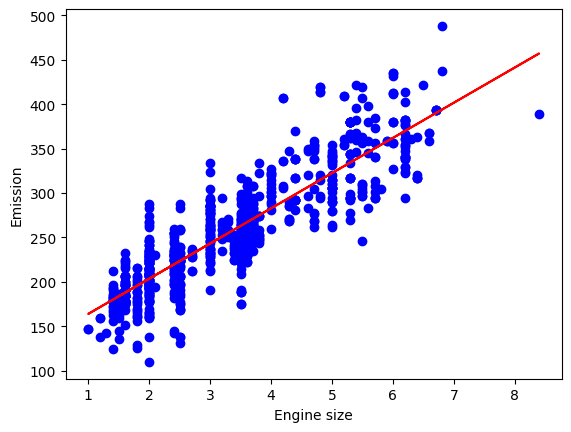

In [234]:
#Visualization of the linear regression (red line)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [235]:
#This line imports the r2_score function from scikit-learn, which is used to calculate the R-squared metric.#
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

#This line uses the trained linear regression model (regr) to make predictions on the test data (test_x)
#Resulting in predicted values stored in test_y_.
test_y_ = regr.predict(test_x)

#This line calculates the Mean Absolute Error (MAE) between the actual (test_y) and predicted (test_y_) values.
#It is representing the average absolute difference between the predicted and actual values.
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_,test_y)))

#Mean squared value presents the average of the squares of the differences between the predicted and actual values.
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_,test_y) ** 2))

#(R2-score) metric, which represents the proportion of the variance in the dependent variable that is predictable from the independent variables. 
#Higher values of R2-score indicate a better fit of the model to the data.
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
#In general, lower MAE and MSE values and higher R2 (max 1) values are indicative of better model performance.

Mean absolute error: 23.79
Residual sum of squares (MSE): 994.95
R2-score: 0.69


SLR for 'Fuel Consumption'

In [236]:
train_x = train[["FUELCONSUMPTION_COMB"]]

test_x = test[["FUELCONSUMPTION_COMB"]]

In [237]:
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

LinearRegression()

In [238]:
predictions = regr.predict(test_x)

In [239]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions,test_y)))

Mean Absolute Error: 20.46


Multiple Linear Regression
When there are multiple independet variable (x), MLR should be used to predcit the dependent variable(y). 
MLR is an extension of SLR,there is a need to add new variable and adjust the code. In other words, it measures how much the independent variables influence the dependent variable and it can be used to analyze the potential impact of changes.

In [240]:
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 72629  100 72629    0     0  74521      0 --:--:-- --:--:-- --:--:-- 74952


In [241]:
#Same dataset but new name for it
data2 = pd.read_csv('FuelConsumptionCo2.csv')
data2.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,"SUV,SMALL",3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,"SUV,SMALL",3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [242]:
cdata2 = data2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdata2.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


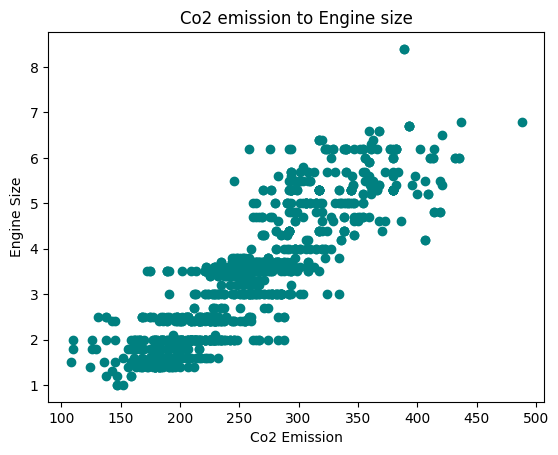

In [243]:
plt.scatter(cdata2.CO2EMISSIONS, cdata2.ENGINESIZE,color='teal')
plt.xlabel('Co2 Emission')
plt.ylabel('Engine Size')
plt.title('Co2 emission to Engine size')
plt.show()

In [244]:
mask2 = np.random.rand(len(data2)) < 0.8
train2 = cdata2[mask2]
test2 = cdata2[~mask2]

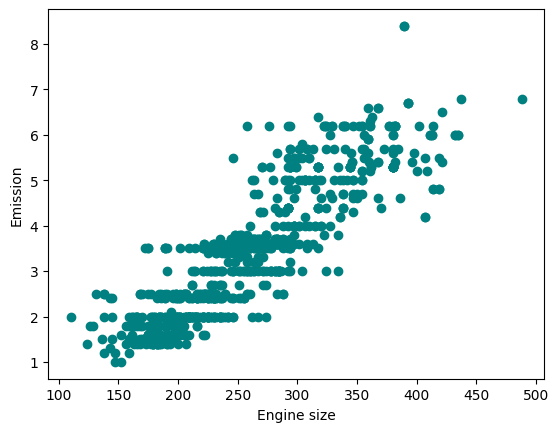

In [245]:
plt.scatter(train2.CO2EMISSIONS, train2.ENGINESIZE, color='teal')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [246]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

#Adding new columns for the MLR
xtrain2 = np.asanyarray(train2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
ytrain2 = np.asanyarray(train2[['CO2EMISSIONS']])
regr.fit(xtrain2, ytrain2)

#There are going to be three answers for each variable. This commend will print the coefficients of the model,
# which indicate the strength and direction of the relationship between each independent variable and the dependent variable.
print(regr.coef_)


[[11.70777668  7.35526813  9.50368917]]


In [247]:
y_hat = regr.predict(test2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
xtrain2 = np.asanyarray(test2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
ytrain2 = np.asanyarray(test2[['CO2EMISSIONS']])
print("Mean squared value (MSE): %.2f" % np.mean((y_hat-ytrain2)**2))
print('Variance score: %.2f' % regr.score(xtrain2, ytrain2))

Mean squared value (MSE): 515.94
Variance score: 0.85


/Users/bartlomiejszafran/anaconda3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


MLR for 4 values

In [248]:
regr = linear_model.LinearRegression()
x2 = np.asanyarray(train2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y2 = np.asanyarray(train2[['CO2EMISSIONS']])
regr.fit (x2, y2)
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.80835433  6.85029876  6.5573472   2.51598715]]


In [249]:
y_hat2 = regr.predict(test2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x2 = np.asanyarray(test2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y2 = np.asanyarray(test2[['CO2EMISSIONS']])
print("Mean squared value (MSE): %.2f" % np.mean((y_hat2-y2)**2))
print('Variance score: %.2f' % regr.score(x2, y2))

Mean squared value (MSE): 520.83
Variance score: 0.84


/Users/bartlomiejszafran/anaconda3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Polynominal Regression is a more flexible modeling technique that can capture both linear and non-linear relationships between variables.
Polynomial regression allows for more flexible modeling of complex relationships in the data.

In [250]:
data3 = pd.read_csv('FuelConsumptionCo2.csv')
data3.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,"SUV,SMALL",3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,"SUV,SMALL",3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [251]:
cdata3 = data3[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

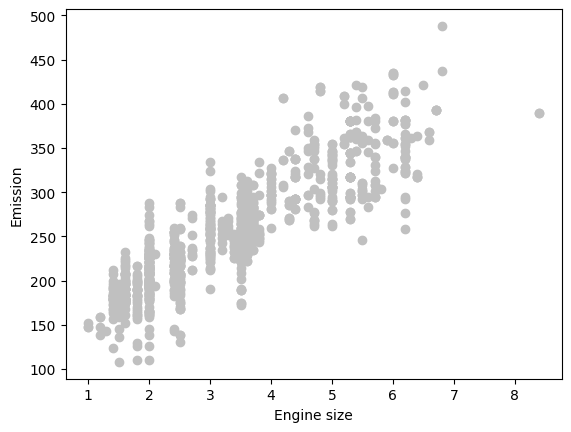

In [252]:
plt.scatter(cdata3.ENGINESIZE, cdata3.CO2EMISSIONS,  color='silver')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [253]:
mask3 = np.random.rand(len(data3)) < 0.8
train3 = cdata3[mask3]
test3 = cdata3[~mask3]

In [254]:
#Imports the Polymial 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

#These lines prepare the training and test data by extracting the independent variable (ENGINESIZE) and the dependent variable (CO2EMISSIONS).
train_x3 = np.asanyarray(train3[['ENGINESIZE']])
train_y3 = np.asanyarray(train3[['CO2EMISSIONS']])

test_x3 = np.asanyarray(test3[['ENGINESIZE']])
test_y3 = np.asanyarray(test3[['CO2EMISSIONS']])

#PolynomialFeatures object with a degree of 2, indicating that polynomial features up to the second degree will be generated. 
#Then, it transforms the original train_x3 data into polynomial features using the fit_transform() method.
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x3)

#This line prints the transformed features after applying polynomial transformation. 
#It shows the polynomial features generated from the original train_x3 data.
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [255]:
regr3 = linear_model.LinearRegression()
train_y_ = regr3.fit(train_x_poly, train_y3)
print ('Coefficients: ', regr3.coef_)
print ('Intercept: ',regr3.intercept_)

Coefficients:  [[ 0.         47.81608861 -1.13270839]]
Intercept:  [111.70516814]


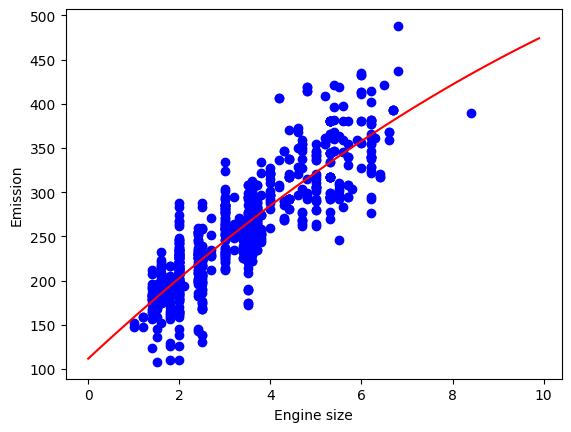

In [256]:
plt.scatter(train3.ENGINESIZE, train3.CO2EMISSIONS,  color='blue')

#Indicates an array based on the (x) engine sizes
X = np.arange(0.0, 10.0, 0.1)
y = regr3.intercept_[0]+ regr3.coef_[0][1]*X+ regr3.coef_[0][2]*np.power(X, 2)
plt.plot(X, y, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [257]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x3)
test_y_ = regr3.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_,test_y3)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_,test_y3) ** 2))
print("R2-score: %.2f" % r2_score(test_y3,test_y_ ) )

Mean absolute error: 22.21
Residual sum of squares (MSE): 825.12
R2-score: 0.81


Poly to cubic

In [258]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x3)
train_x_poly3

array([[ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [259]:
regr4 = linear_model.LinearRegression()
train_y_3 = regr4.fit(train_x_poly3, train_y3)
print ('Coefficients: ', regr4.coef_)
print ('Intercept: ',regr4.intercept_)

Coefficients:  [[ 0.         29.647446    3.94486824 -0.42805592]]
Intercept:  [130.85044649]


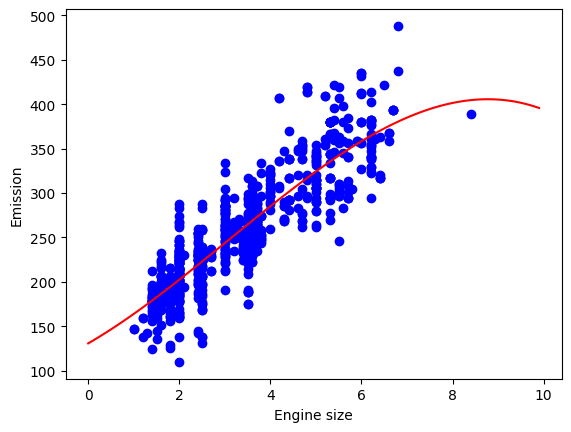

In [260]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
X2 = np.arange(0.0, 10.0, 0.1)
y2 = regr4.intercept_[0]+ regr4.coef_[0][1]*XX + regr4.coef_[0][2]*np.power(XX, 2) + regr4.coef_[0][3]*np.power(XX, 3)
plt.plot(X2, y2, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [261]:
from sklearn.metrics import r2_score

test_x_poly3 = poly3.transform(test_x3)
test_y_3 = regr4.predict(test_x_poly3)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_3,test_y3)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_3,test_y3) ** 2))
print("R2-score: %.2f" % r2_score(test_y3,test_y_3 ) )

Mean absolute error: 22.07
Residual sum of squares (MSE): 814.78
R2-score: 0.81


Non-linear regression


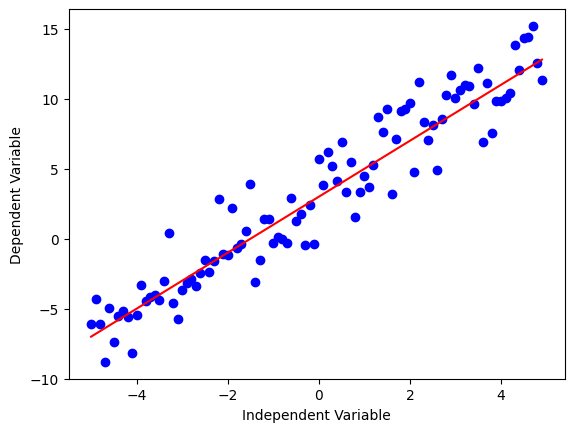

In [262]:
#Example of linear 
x = np.arange (-5.0, 5.0, 0.1)
y = 2*(x)+3

#These lines introduce random noise to the dependent variable y by adding values drawn from a normal distribution with mean 0 and standard deviation 2. 
#This simulates real-world data where the relationship between variables may not be perfectly linear.
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()


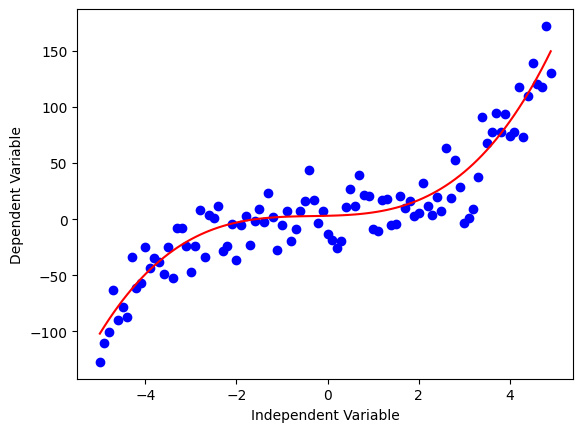

In [263]:
#Example of nonlinear 
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

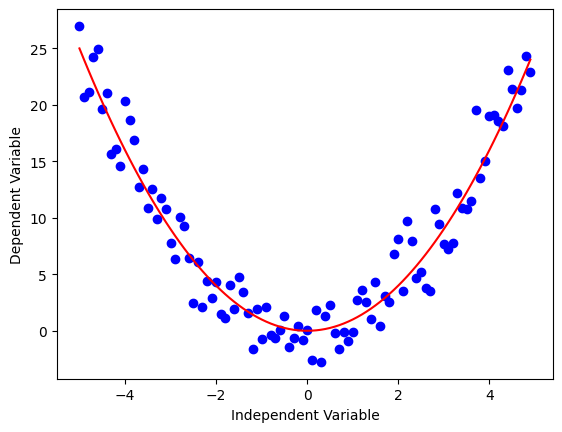

In [264]:
#Quadratic typeof non-linear
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

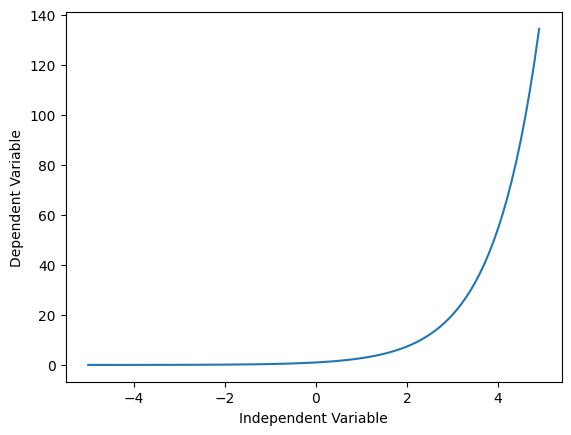

In [265]:
#Exponential of non-linear
X = np.arange(-5.0, 5.0, 0.1)

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_63106/3040591169.py:4: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


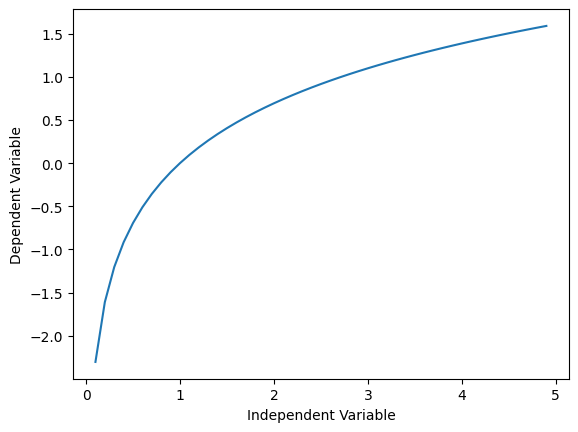

In [266]:
#Logaritmic of non-linear
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

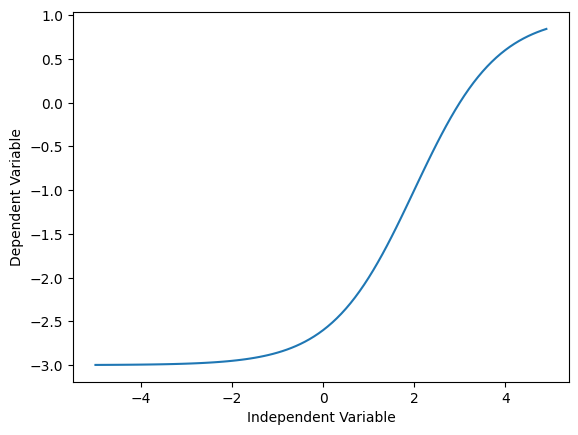

In [267]:
#Sigmoidal/Logistic
X = np.arange(-5.0, 5.0, 0.1)

Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [268]:
!curl -nv -O https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv

* Couldn't find host cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud in the (nil) file; using defaults
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0*   Trying 198.23.119.245:443...
* Connected to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (198.23.119.245) port 443 (#0)
* ALPN: offers h2,http/1.1
* (304) (OUT), TLS handshake, Client hello (1):
} [363 bytes data]
*  CAfile: /etc/ssl/cert.pem
*  CApath: none
* (304) (IN), TLS handshake, Server hello (2):
{ [102 bytes data]
* TLSv1.2 (IN), TLS handshake, Certificate (11):
{ [4135 bytes data]
* TLSv1.2 (IN), TLS handshake, Server key exchange (12):
{ [333 bytes data]
* TLSv1.2 (IN), TLS handshake, Server finished (14):
{ [4 bytes data]
* TLSv1.2 (OUT), TLS handshake, Client key exchange (16):
} [70 bytes data]
* TLSv1.2 (OUT),

In [269]:
data_china = pd.read_csv("china_gdp.csv")
data_china.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


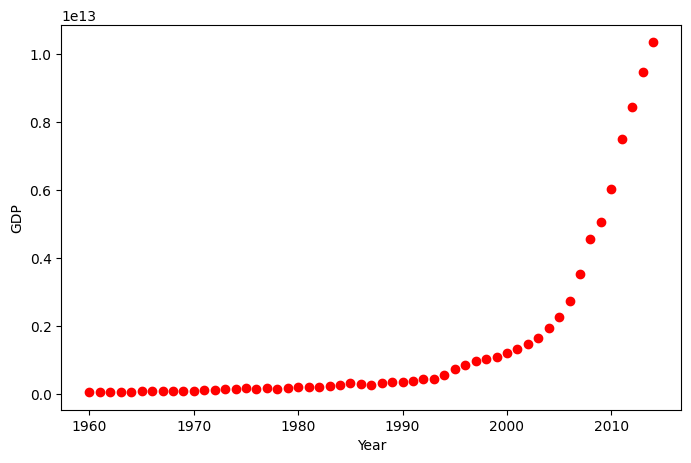

In [270]:
plt.figure(figsize=(8,5))
x_data, y_data = (data_china["Year"].values, data_china["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [271]:
#The sigmoid function
def sigmoid (x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

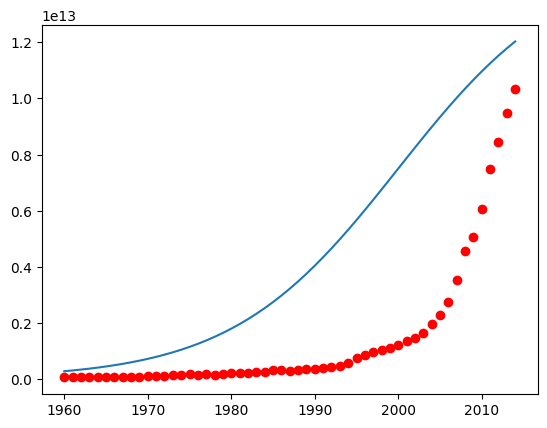

In [272]:
beta_1 = 0.10
beta_2 = 2000.0

#This line applies the sigmoid function (sigmoid()) to the input data points x_data, using the specified parameters beta_1 and beta_2.
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#Plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [273]:
#Normalize data, it help improve the performance and convergence of machine learning algorithms, 
# particularly those sensitive to the scale of input features, such as gradient-based optimization algorithms.
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [274]:
from scipy.optimize import curve_fit

#popt: An array containing the optimized parameters (beta_1 and beta_2) for the sigmoid function.
#pcov: The estimated covariance of popt.
popt, pcov = curve_fit(sigmoid, xdata,ydata)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


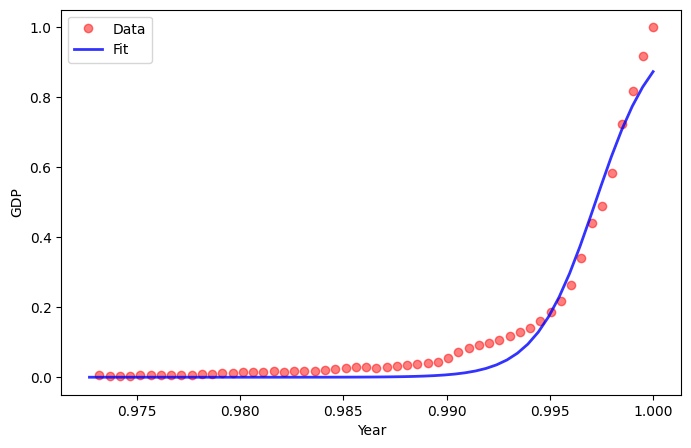

In [275]:
x = np.linspace(1960,2015,55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x,*popt)
plt.plot(xdata, ydata, 'ro', label='Data', alpha=0.5)
plt.plot(x,y, linewidth=2.0, label='Fit', color='blue', alpha=0.8)
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

#Accuracy

In [276]:
msk = np.random.rand(len(data_china)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

popt, pcov = curve_fit(sigmoid, train_x, train_y)

y_hat = sigmoid(test_x, *popt)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat,test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat,test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y,y_hat) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.95
